In [1]:
#!pip install wordcloud

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob

In [3]:
df = pd.read_csv("Cleaned_BA_reviews.csv")
df = df.drop("Unnamed: 0",axis=1)

In [4]:
df.head()

reviews        date  \
0  ✅ Trip Verified |  I have come to boarding and...  2024-01-28   
1  ✅ Trip Verified | Stinking nappies being chang...  2024-01-26   
2  ✅ Trip Verified | Worst service ever. Lost bag...  2024-01-23   
3  ✅ Trip Verified |  BA 246 21JAN 2023 Did not a...  2024-01-21   
4  ✅ Trip Verified | Not a great experience. I co...  2024-01-18   

          country  ratings                                             corpus  
0         Ukraine        3  come boarding cabin luggage taken plane full a...  
1  United Kingdom        2  stinking nappy changed business cabin througho...  
2         Germany        1  worst service ever lost baggage delayed flight...  
3  United Kingdom        6  ba jan appreciate unprofessional attitude pilo...  
4  United Kingdom        3  great experience could check online two separa...

In [5]:
df.describe()

ratings
count  3735.000000
mean      4.714056
std       3.158745
min       1.000000
25%       2.000000
50%       4.000000
75%       8.000000
max      10.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3735 entries, 0 to 3734
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  3735 non-null   object
 1   date     3735 non-null   object
 2   country  3735 non-null   object
 3   ratings  3735 non-null   int64 
 4   corpus   3735 non-null   object
dtypes: int64(1), object(4)
memory usage: 146.0+ KB


In [7]:
df.isnull().sum()

reviews    0
date       0
country    0
ratings    0
corpus     0
dtype: int64

# EDA

###  Q1: Distribution of customer ratings



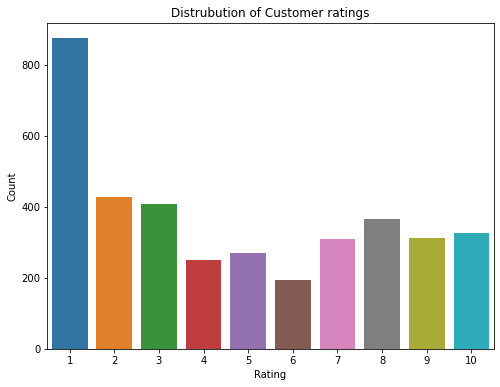

In [8]:
plt.figure(figsize=(8,6))
sns.countplot(x='ratings',data=df)
plt.title("Distrubution of Customer ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

### Q2: Correlation between review lengths and ratings


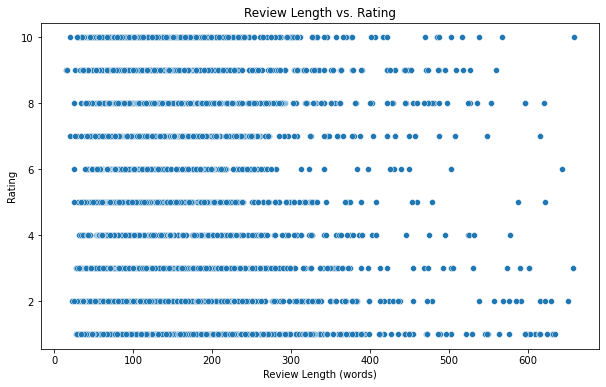

Sample Review Sentiment: Sentiment(polarity=0.10200892857142857, subjectivity=0.33839285714285716)


In [9]:
df['review_length'] = df['reviews'].apply(lambda x: len(x.split()) if pd.notnull(x) else 0)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_length', y='ratings', data=df)
plt.title('Review Length vs. Rating')
plt.xlabel('Review Length (words)')
plt.ylabel('Rating')
plt.show()

# Sentiment Analysis example (using TextBlob for a sample review)
sample_review = df['reviews'].dropna().iloc[0]
blob = TextBlob(sample_review)
print(f"Sample Review Sentiment: {blob.sentiment}")


### Q3. Highest ratings by Country



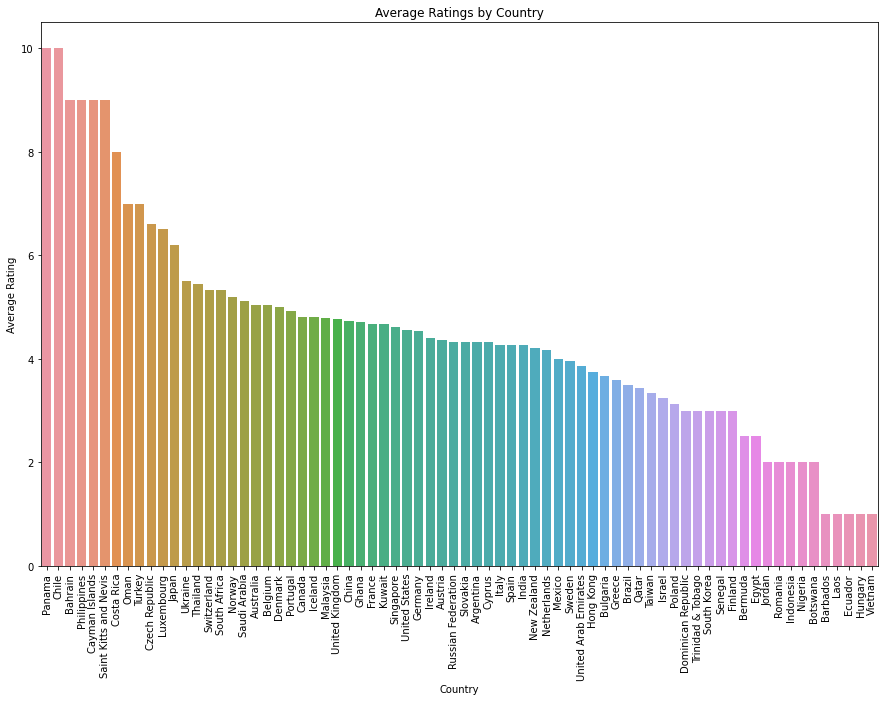

In [10]:
plt.figure(figsize=(15, 10))
country_ratings = df.groupby('country')['ratings'].mean().sort_values(ascending=False)
sns.barplot(x=country_ratings.index, y=country_ratings.values)
plt.xticks(rotation=90)  # Rotate country names for better readability
plt.title('Average Ratings by Country')
plt.xlabel('Country')
plt.ylabel('Average Rating')
plt.show()

### Q4. Yearly Average ratings

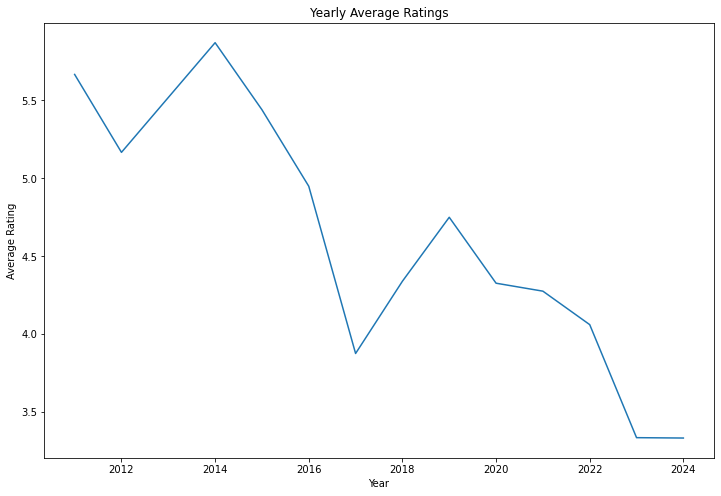

In [11]:
# Assuming there's a 'date' column from which you can extract the year
df['year'] = pd.DatetimeIndex(df['date']).year  # Extract year

plt.figure(figsize=(12,8))
yearly_avg_ratings = df.groupby('year')['ratings'].mean()
sns.lineplot(x=yearly_avg_ratings.index, y=yearly_avg_ratings.values)
plt.title('Yearly Average Ratings')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()


### Q5.Year with Highest ratings

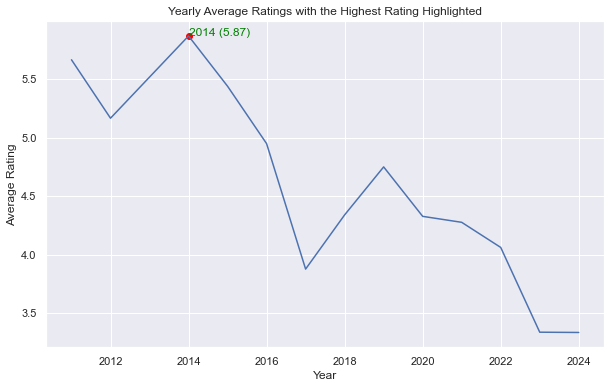

In [12]:
# Use the 'yearly_avg_ratings' DataFrame calculated previously
max_rating_year = yearly_avg_ratings.idxmax()
max_rating_value = yearly_avg_ratings.max()

# Set the seaborn style
sns.set(style="darkgrid")  # Try other styles like 'whitegrid', 'dark', 'white', and 'ticks'

plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_avg_ratings.index, y=yearly_avg_ratings.values)
plt.scatter(max_rating_year, max_rating_value, color='red')  # Highlight the year with the highest rating
plt.text(max_rating_year, max_rating_value, f'{max_rating_year} ({max_rating_value:.2f})', color='green', ha='left')
plt.title('Yearly Average Ratings with the Highest Rating Highlighted')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()


### Q6.Average ratings by Country

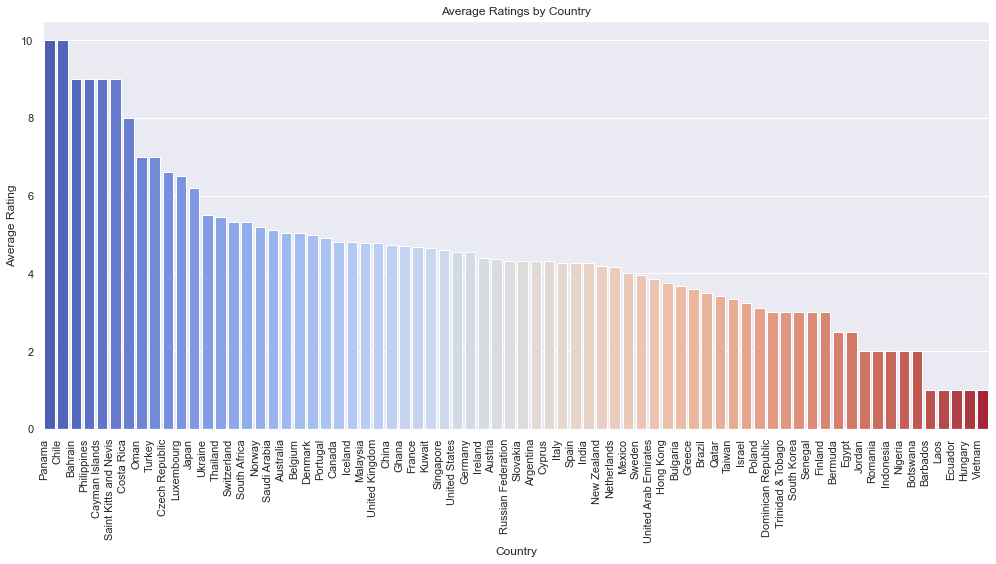

In [13]:
# Assuming 'country' and 'rating' are columns in your DataFrame and 'rating' is numeric
# First, we'll calculate the average rating for each country
avg_ratings_by_country = df.groupby('country')['ratings'].mean().sort_values(ascending=False)

# Now, let's create a bar plot to visualize the average ratings by country
plt.figure(figsize=(14, 8))
sns.barplot(x=avg_ratings_by_country.index, y=avg_ratings_by_country.values, palette='coolwarm')
plt.xticks(rotation=90, ha='right')  # Rotate country names for better readability
plt.title('Average Ratings by Country')
plt.xlabel('Country')
plt.ylabel('Average Rating')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()


## Time Series Analysis

In [14]:
import plotly.express as px

fig = px.line(df, x="date", y="ratings")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

we can observe a drop in number of bookings from April 2020 to August 2021 due to COVID Pandemic travel restrictions.

## Topic Modelling - LDA

In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Download stopwords from NLTK
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    tokens = text.split()
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Preprocess each document
preprocessed_docs = [preprocess(doc) for doc in df['corpus']]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Welcome\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Welcome\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
preprocessed_docs

['come boarding cabin luggage taken plane full asked take cabin large notebook electronics nothing change sitting plane holding notebook several pack luggage think stand stuff hand passport control line warsaw people around come plane cabin luggage',
 'stinking nappy changed business cabin throughout flight miami four u one family travelling british airway business british airway gold card member member british airway executive club since ever fly british airway first class business class become habit fly ba trust safety regular long haul flight booked british airway first business next year often fly usa wife used virgin atlantic gold card however sadly returned ba virgin first class seat product even service virgin gold card department scale absolutely brilliant loved virgin lounge heathrow flight miami british airway one double decker aircraft big believe contributed appalling service perhaps familiarity breed contempt however whether business first view ba aircraft dirty bus sky fo

In [17]:
len(preprocessed_docs)

3735

In [18]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel

# Create a dictionary representation of the documents
dictionary = Dictionary(doc.split() for doc in preprocessed_docs)

# Filter out words that occur in less than 20 documents or more than 50% of the documents
dictionary.filter_extremes(no_below=20, no_above=0.5)

# Create a bag-of-words representation of the documents
corpus = [dictionary.doc2bow(doc.split()) for doc in preprocessed_docs]


In [19]:
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 3),
  (4, 1),
  (5, 2),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 3),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 3),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1)],
 [(0, 1),
  (1, 2),
  (3, 9),
  (13, 1),
  (25, 1),
  (26, 1),
  (27, 2),
  (28, 10),
  (29, 2),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 2),
  (34, 1),
  (35, 1),
  (36, 2),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 4),
  (42, 1),
  (43, 10),
  (44, 1),
  (45, 8),
  (46, 4),
  (47, 1),
  (48, 2),
  (49, 4),
  (50, 1),
  (51, 11),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 2),
  (60, 4),
  (61, 2),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 2),
  (77, 9),
  (78, 4),
  (79, 2),
  (80, 1),
  (81, 4),
  (82, 2),
  (83, 1),
  (84, 6),
  (85, 1),
  (86, 1),
  (87, 1

In [20]:
len(corpus)

3735

In [21]:
# Set training parameters
num_topics = 10  # Adjust this according to your needs
passes = 10  # Number of passes through the corpus during training

# Train the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=passes)

# Print the topics found by the LDA model
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))


Topic: 0 
Words: 0.023*"club" + 0.017*"cabin" + 0.014*"crew" + 0.014*"service" + 0.014*"world" + 0.012*"passenger" + 0.010*"one" + 0.009*"row" + 0.008*"get" + 0.008*"british"
Topic: 1 
Words: 0.126*"class" + 0.108*"business" + 0.034*"economy" + 0.023*"airway" + 0.021*"british" + 0.017*"lounge" + 0.017*"first" + 0.014*"london" + 0.012*"premium" + 0.011*"food"
Topic: 2 
Words: 0.047*"lounge" + 0.026*"club" + 0.024*"good" + 0.020*"boarding" + 0.018*"service" + 0.017*"check" + 0.016*"time" + 0.014*"europe" + 0.014*"food" + 0.012*"fast"
Topic: 3 
Words: 0.025*"good" + 0.017*"food" + 0.016*"crew" + 0.015*"lhr" + 0.014*"cabin" + 0.012*"service" + 0.011*"comfortable" + 0.011*"time" + 0.009*"excellent" + 0.009*"london"
Topic: 4 
Words: 0.016*"meal" + 0.014*"food" + 0.011*"service" + 0.011*"first" + 0.010*"cabin" + 0.009*"one" + 0.009*"crew" + 0.008*"drink" + 0.008*"choice" + 0.007*"passenger"
Topic: 5 
Words: 0.033*"customer" + 0.032*"british" + 0.031*"service" + 0.031*"airway" + 0.026*"airline

In [22]:
from gensim.models.coherencemodel import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=[doc.split() for doc in preprocessed_docs], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)


Coherence Score:  0.3746315879871365


### VADER Sentiment Analysis

In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Welcome\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [24]:
sid = SentimentIntensityAnalyzer()


In [25]:
def analyze_sentiment(review):
    scores = sid.polarity_scores(review)
    return scores['compound']  # Return the compound score


In [26]:
df['sentiment_score'] = df['corpus'].apply(analyze_sentiment)

def categorize_score(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['sentiment_score'].apply(categorize_score)

In [27]:
df

reviews        date  \
0     ✅ Trip Verified |  I have come to boarding and...  2024-01-28   
1     ✅ Trip Verified | Stinking nappies being chang...  2024-01-26   
2     ✅ Trip Verified | Worst service ever. Lost bag...  2024-01-23   
3     ✅ Trip Verified |  BA 246 21JAN 2023 Did not a...  2024-01-21   
4     ✅ Trip Verified | Not a great experience. I co...  2024-01-18   
...                                                 ...         ...   
3730  Flew LHR - VIE return operated by bmi but BA a...  2012-08-29   
3731  LHR to HAM. Purser addresses all club passenge...  2012-08-28   
3732  My son who had worked for British Airways urge...  2011-10-12   
3733  London City-New York JFK via Shannon on A318 b...  2011-10-11   
3734  SIN-LHR BA12 B747-436 First Class. Old aircraf...  2011-10-09   

             country  ratings  \
0            Ukraine        3   
1     United Kingdom        2   
2            Germany        1   
3     United Kingdom        6   
4     United Kingdom        3   
...              ...      ...   
3730  United Kingdom        8   
3731  United Kingdom        2   
3732  United Kingdom        7   
3733   United States        1   
3734  United Kingdom        9   

                                                 corpus  review_length  year  \
0     come boarding cabin luggage taken plane full a...             89  2024   
1     stinking nappy changed business cabin througho...            616  2024   
2     worst service ever lost baggage delayed flight...             61  2024   
3     ba jan appreciate unprofessional attitude pilo...            128  2024   
4     great experience could check online two separa...            127  2024   
...                                                 ...            ...   ...   
3730  flew lhr vie return operated bmi ba aircraft a...             81  2012   
3731  lhr ham purser address club passenger name boa...             25  2012   
3732  son worked british airway urged fly british ai...            230  2011   
3733  london city new york jfk via shannon really ni...             33  2011   
3734  sin lhr ba b first class old aircraft seat pri...            117  2011   

      sentiment_score sentiment  
0              0.4767  Positive  
1              0.5542  Positive  
2             -0.9501  Negative  
3              0.2960  Positive  
4              0.9349  Positive  
...               ...       ...  
3730           0.9531  Positive  
3731           0.7650  Positive  
3732           0.7003  Positive  
3733           0.8070  Positive  
3734          -0.2500  Negative  

[3735 rows x 9 columns]

In [28]:
# Example: Aggregating average sentiment score by country
average_sentiment_by_country = df.groupby('country')['sentiment_score'].mean()

# Example: Counting sentiment categories by country
sentiment_counts_by_country = df.groupby(['country', 'sentiment']).size().unstack(fill_value=0)


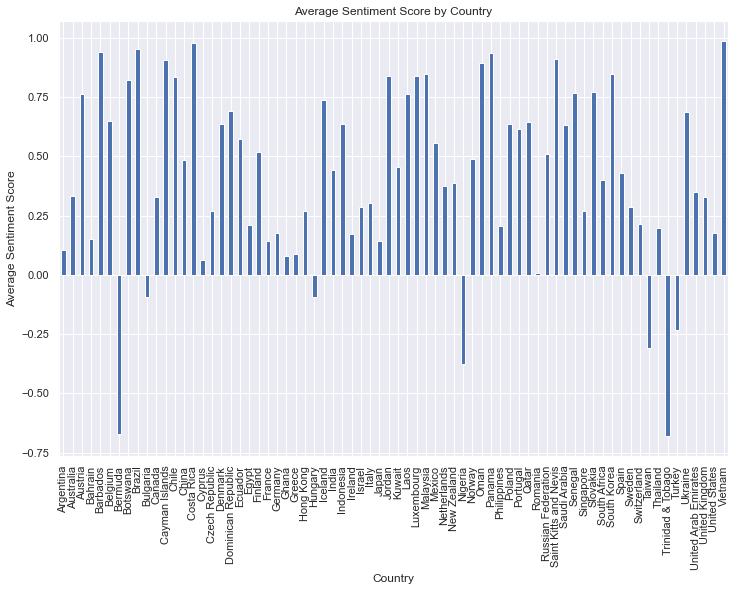

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Bar plot of average sentiment score by country
plt.figure(figsize=(12,8))
average_sentiment_by_country.plot(kind='bar')
plt.title('Average Sentiment Score by Country')
plt.xlabel('Country')
plt.ylabel('Average Sentiment Score')
plt.show()


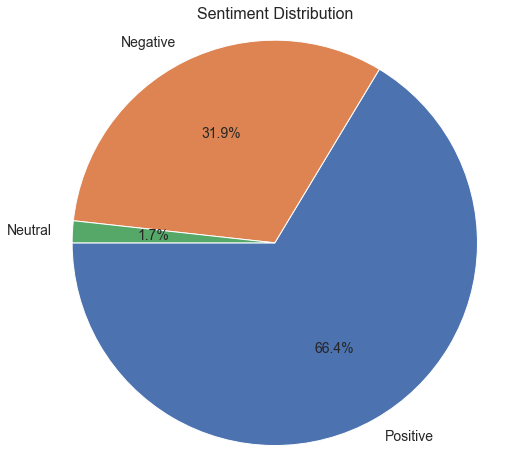

In [30]:
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(sentiment_counts, labels=sentiment_counts.index,
        autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '',  # Use a lambda to format percentage labels
        startangle=180,
        textprops={'fontsize': 14})  # Increase font size for the labels

plt.title('Sentiment Distribution', fontsize=16)  # Increase font size for the title
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()



## WordCloud

In [31]:
text_data = " ".join(df['corpus'].astype(str))

In [32]:
text_data

'come boarding cabin luggage taken plane full asked take cabin large notebook electronics nothing change sitting plane holding notebook several pack luggage think stand stuff hand passport control line warsaw people around come plane cabin luggage stinking nappy changed business cabin throughout flight miami four u one family travelling british airway business british airway gold card member member british airway executive club since ever fly british airway first class business class become habit fly ba trust safety regular long haul flight booked british airway first business next year often fly usa wife used virgin atlantic gold card however sadly returned ba virgin first class seat product even service virgin gold card department scale absolutely brilliant loved virgin lounge heathrow flight miami british airway one double decker aircraft big believe contributed appalling service perhaps familiarity breed contempt however whether business first view ba aircraft dirty bus sky food mu

In [33]:
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.tokenize import word_tokenize

In [34]:
len(df['country'].unique())

72

In [35]:
df['ratings'].mean()

4.714056224899599